In [69]:
# Imports and initial setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('reddit_database.csv')
df.columns

Index(['created_date', 'created_timestamp', 'subreddit', 'title', 'id',
       'author', 'author_created_utc', 'full_link', 'score', 'num_comments',
       'num_crossposts', 'subreddit_subscribers', 'post'],
      dtype='object')

Text(0, 0.5, 'Post Count')

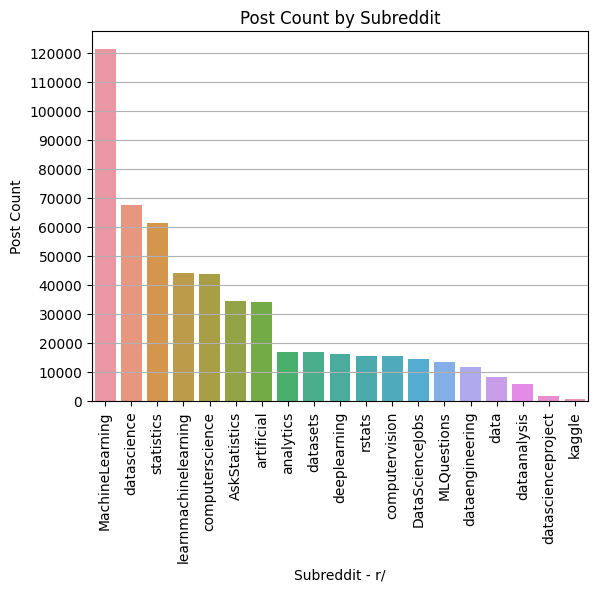

In [70]:
# Post Count by Subreddit
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 130000, 10000))
plt.grid(True)
plt.title('Post Count by Subreddit')
sns.countplot(x='subreddit', data=df, order=df['subreddit'].value_counts().index)
plt.xlabel('Subreddit - r/')
plt.ylabel('Post Count')

Text(0, 0.5, 'Unique Authors')

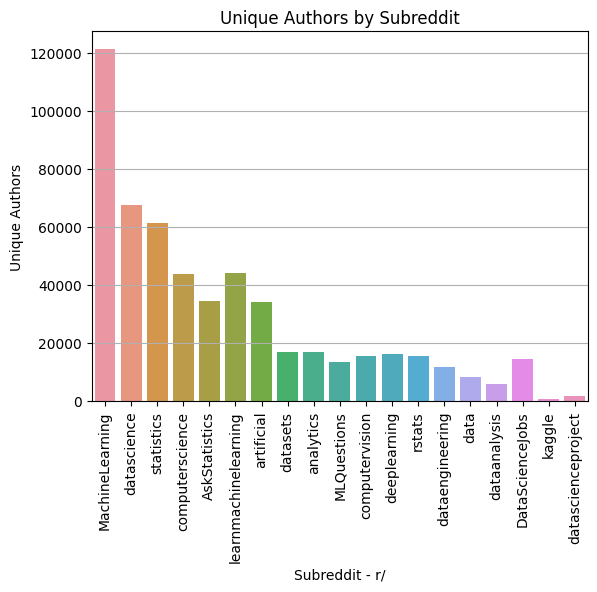

In [71]:
# Unique authors by subreddit
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Unique Authors by Subreddit')
sns.countplot(x='subreddit', data=df, order=df.groupby('subreddit')['author'].nunique().sort_values(ascending=False).index)
plt.xlabel('Subreddit - r/')
plt.ylabel('Unique Authors')

Text(0, 0.5, 'Average Score')

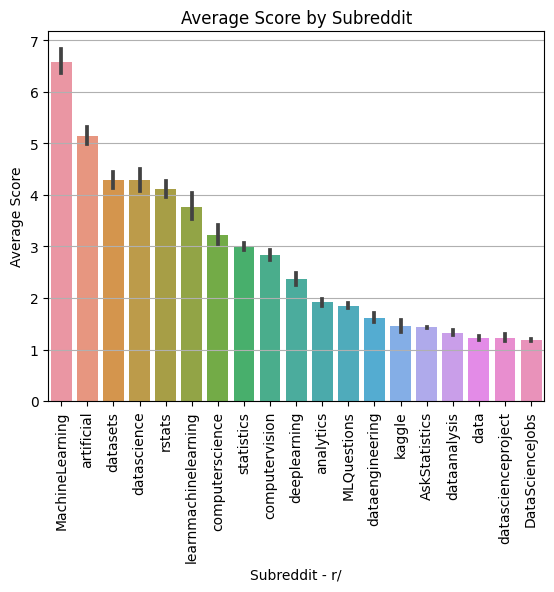

In [72]:
# Average Score by Subreddit
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Average Score by Subreddit')
sns.barplot(x='subreddit', y='score', data=df, order=df.groupby('subreddit')['score'].mean().sort_values(ascending=False).index)
plt.xlabel('Subreddit - r/')
plt.ylabel('Average Score')

Text(0, 0.5, 'Total Number of Comments')

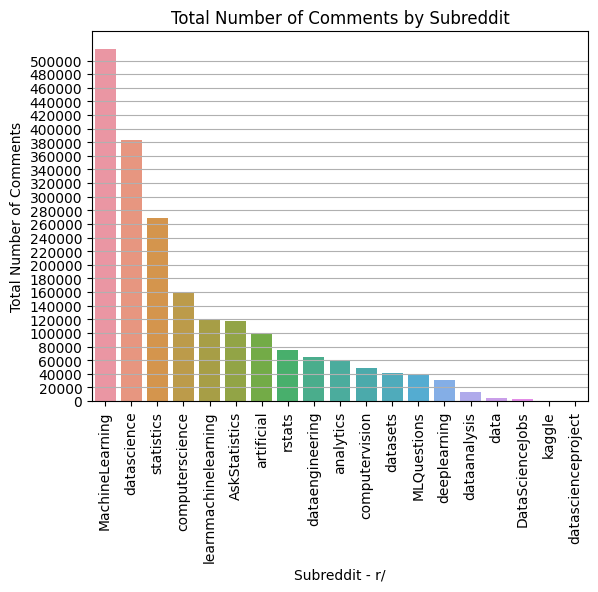

In [73]:
# Total Number of Comments per Subreddit
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 520000, 20000))
plt.grid(True)
plt.title('Total Number of Comments by Subreddit')
sns.barplot(x='subreddit', y='num_comments', data=df.groupby('subreddit')['num_comments'].sum().sort_values(ascending=False).reset_index())
plt.xlabel('Subreddit - r/')
plt.ylabel('Total Number of Comments')

Text(0, 0.5, 'Average Number of Comments')

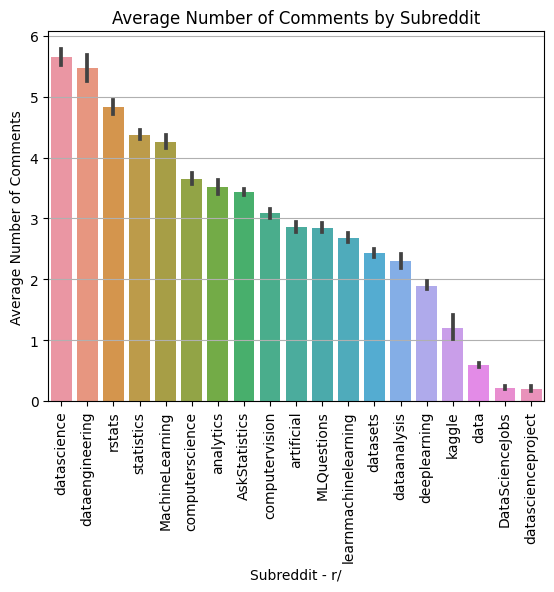

In [74]:
# Average Number of Comments by Subreddit
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Average Number of Comments by Subreddit')
sns.barplot(x='subreddit', y='num_comments', data=df, order=df.groupby('subreddit')['num_comments'].mean().sort_values(ascending=False).index)
plt.xlabel('Subreddit - r/')
plt.ylabel('Average Number of Comments')

Text(0, 0.5, 'Number of Crossposts')

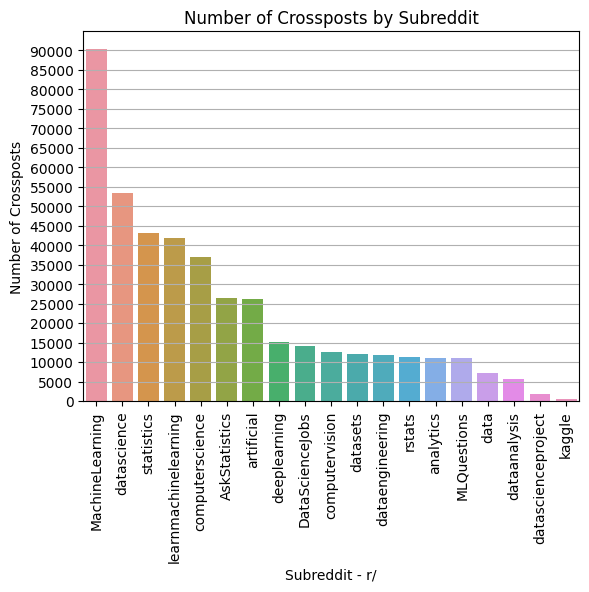

In [75]:
# Number of crossposts per subreddit
crossposts = df.groupby('subreddit')['num_crossposts'].count().sort_values(ascending=False).reset_index()
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 100000, 5000))
plt.grid(True)
plt.title('Number of Crossposts by Subreddit')
sns.barplot(x='subreddit', y='num_crossposts', data=crossposts)
plt.xlabel('Subreddit - r/')
plt.ylabel('Number of Crossposts')

Text(95.72222222222216, 0.5, 'Post Title')

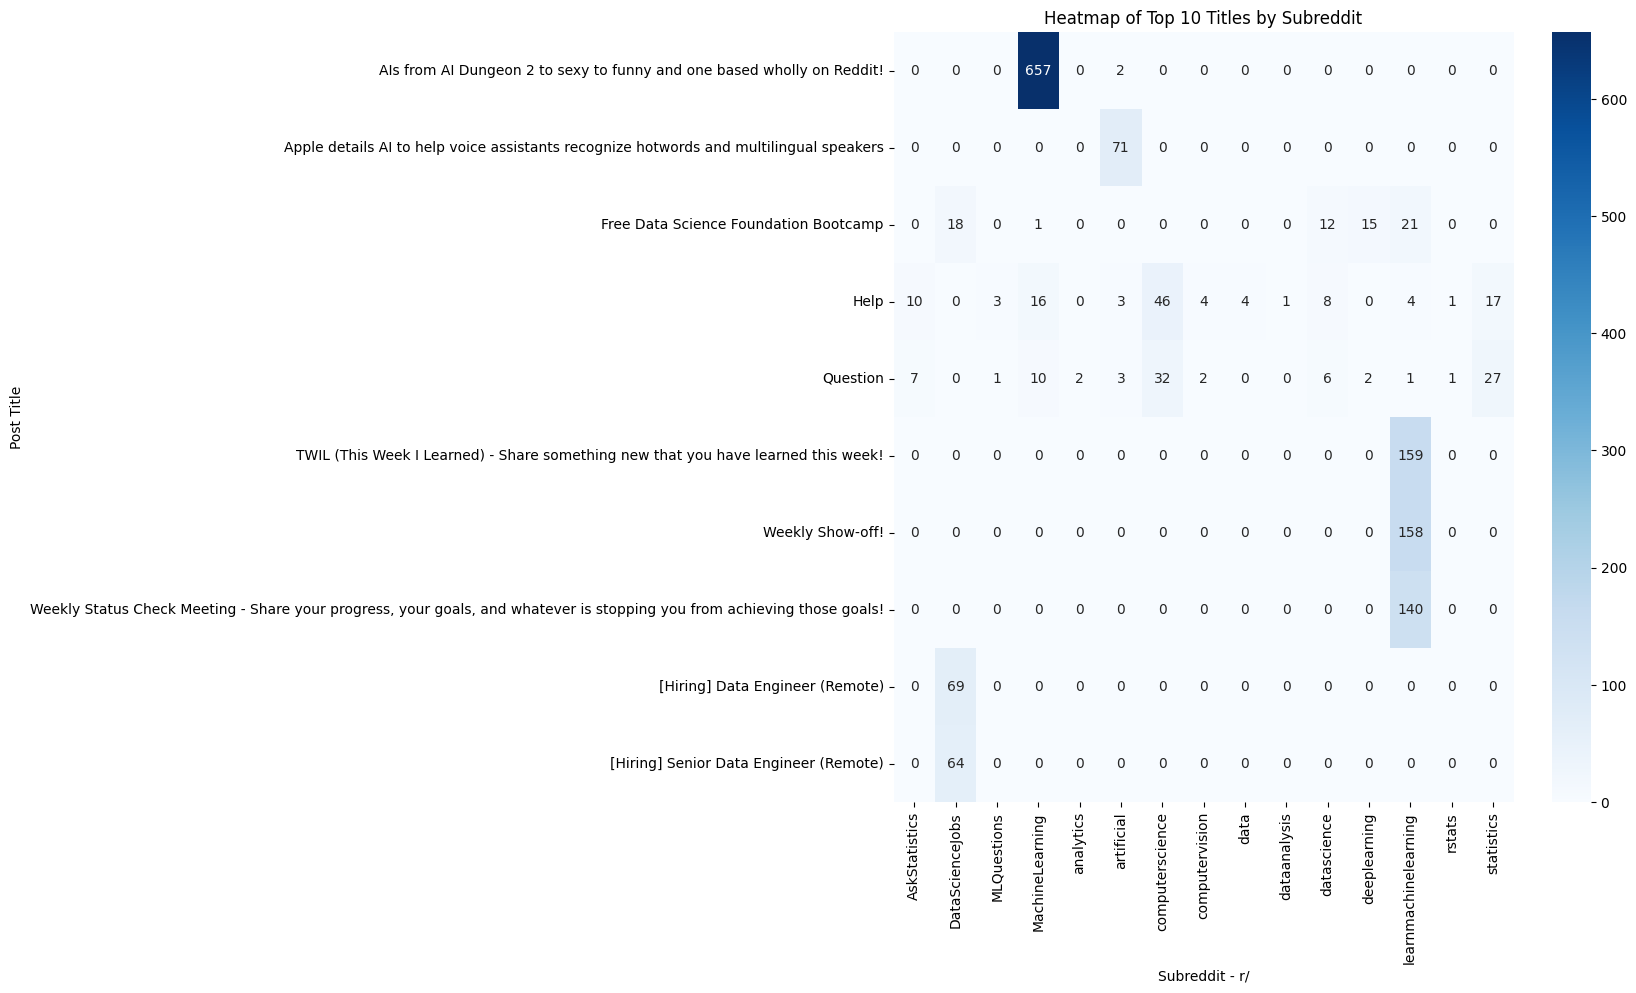

In [76]:
# Heatmap of posts among subreddits
# calculate which titles are the most common
title_counts = df.groupby('title')['title'].count().sort_values(ascending=False).reset_index(name='count').head(10)

# Graph a heatmap of the top 10 titles by subreddit
plt.figure(figsize=(10, 10))
plt.title('Heatmap of Top 10 Titles by Subreddit')
sns.heatmap(df[df['title'].isin(title_counts['title'])].pivot_table(index='title', columns='subreddit', aggfunc='size', fill_value=0), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Subreddit - r/')
plt.ylabel('Post Title')

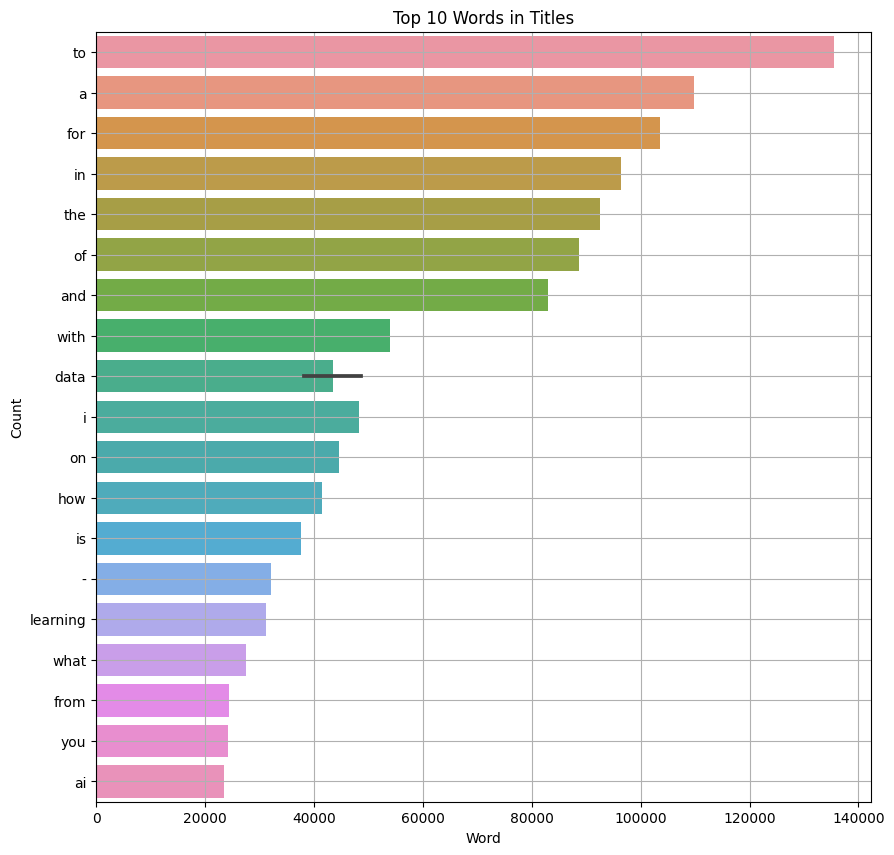

In [77]:
# What is the most common word in the titles?
words = []
for title in df['title']:
    words.extend(title.split())

# create a dataframe of the words and their counts
word_counts = pd.DataFrame(words, columns=['word'])
word_counts = word_counts.groupby('word')['word'].count().sort_values(ascending=False).reset_index(name='count')
word_counts['word'] = word_counts['word'].str.lower()

plt.figure(figsize=(10, 10))
plt.title('Top 10 Words in Titles')
sns.barplot(y='word', x='count', data=word_counts.head(20))
plt.xlabel('Word')
plt.ylabel('Count')
plt.grid(True)

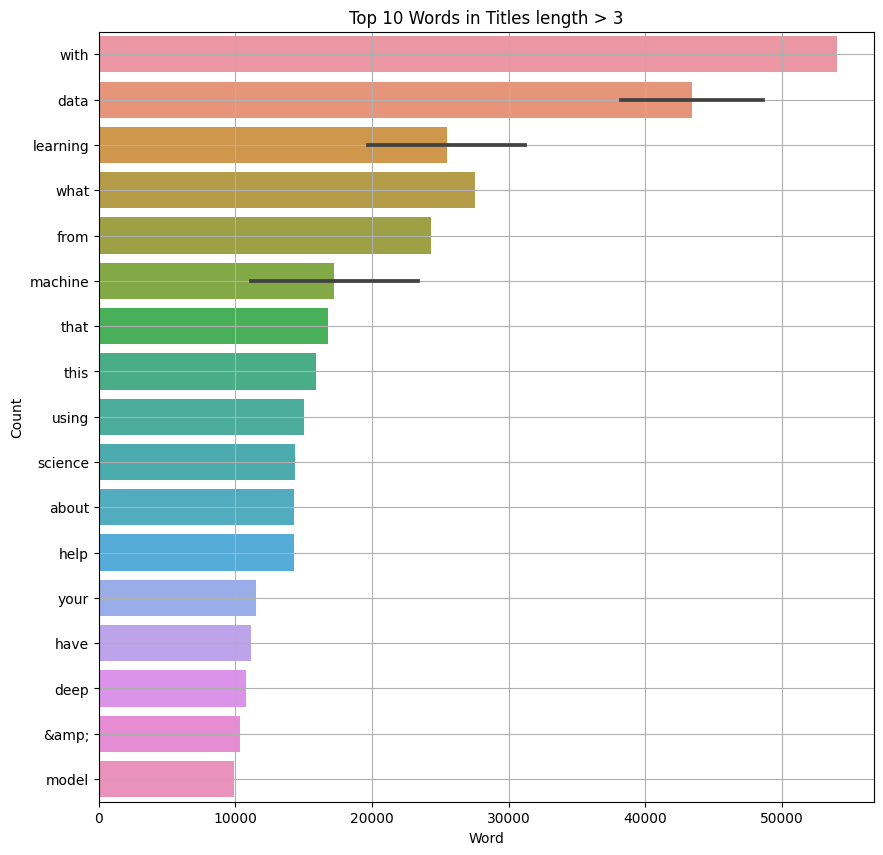

In [78]:
plt.figure(figsize=(10, 10))
plt.title('Top 10 Words in Titles length > 3')
sns.barplot(y='word', x='count', data=word_counts[word_counts['word'].str.len() > 3].head(20))
plt.xlabel('Word')
plt.ylabel('Count')
plt.grid(True)

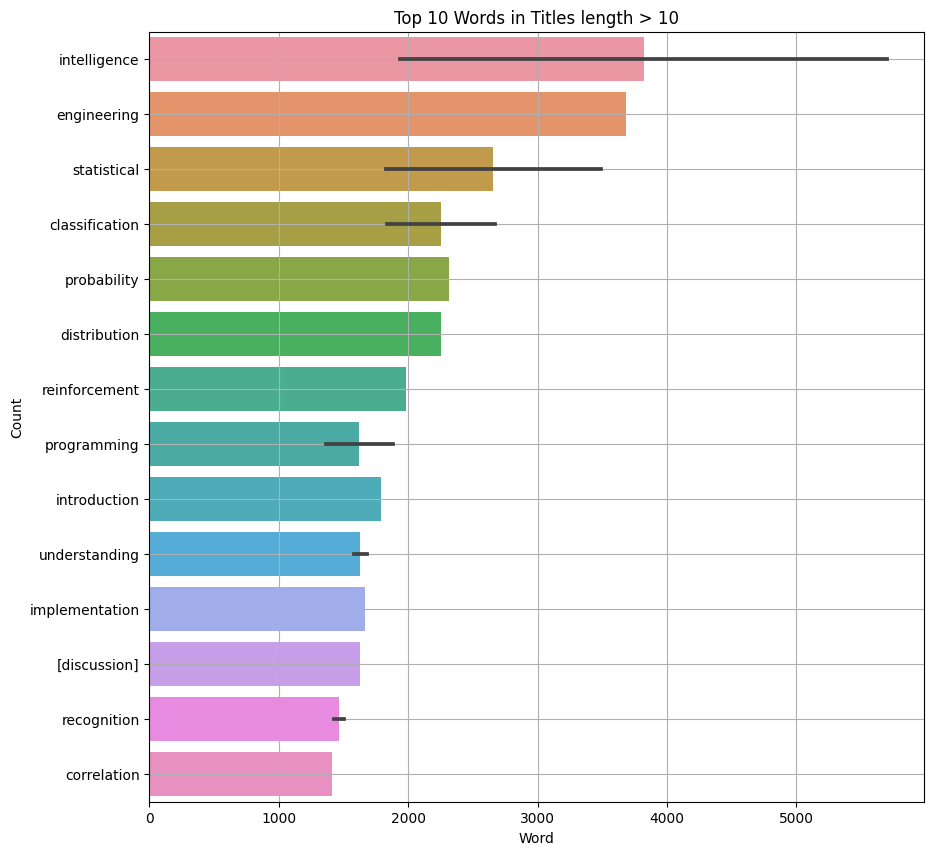

In [79]:
plt.figure(figsize=(10, 10))
plt.title('Top 10 Words in Titles length > 10')
sns.barplot(y='word', x='count', data=word_counts[word_counts['word'].str.len() > 10].head(20))
plt.xlabel('Word')
plt.ylabel('Count')
plt.grid(True)

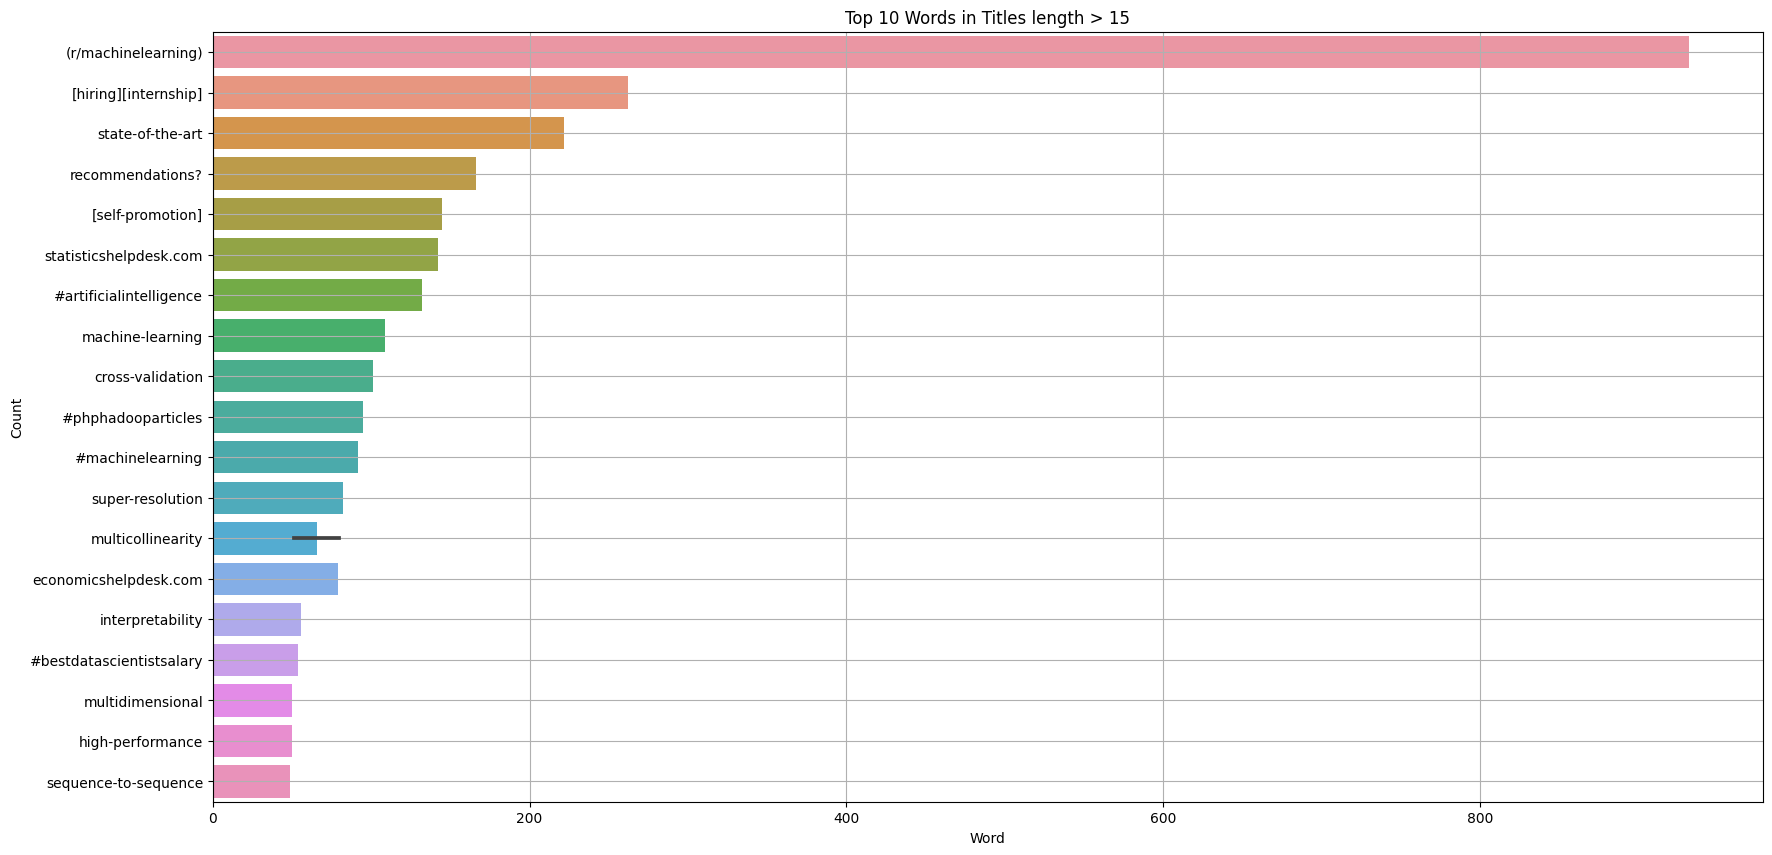

In [80]:
plt.figure(figsize=(20, 10))
plt.title('Top 10 Words in Titles length > 15')
sns.barplot(y='word', x='count', data=word_counts[word_counts['word'].str.len() > 15].head(20))
plt.xlabel('Word')
plt.ylabel('Count')
plt.grid(True)

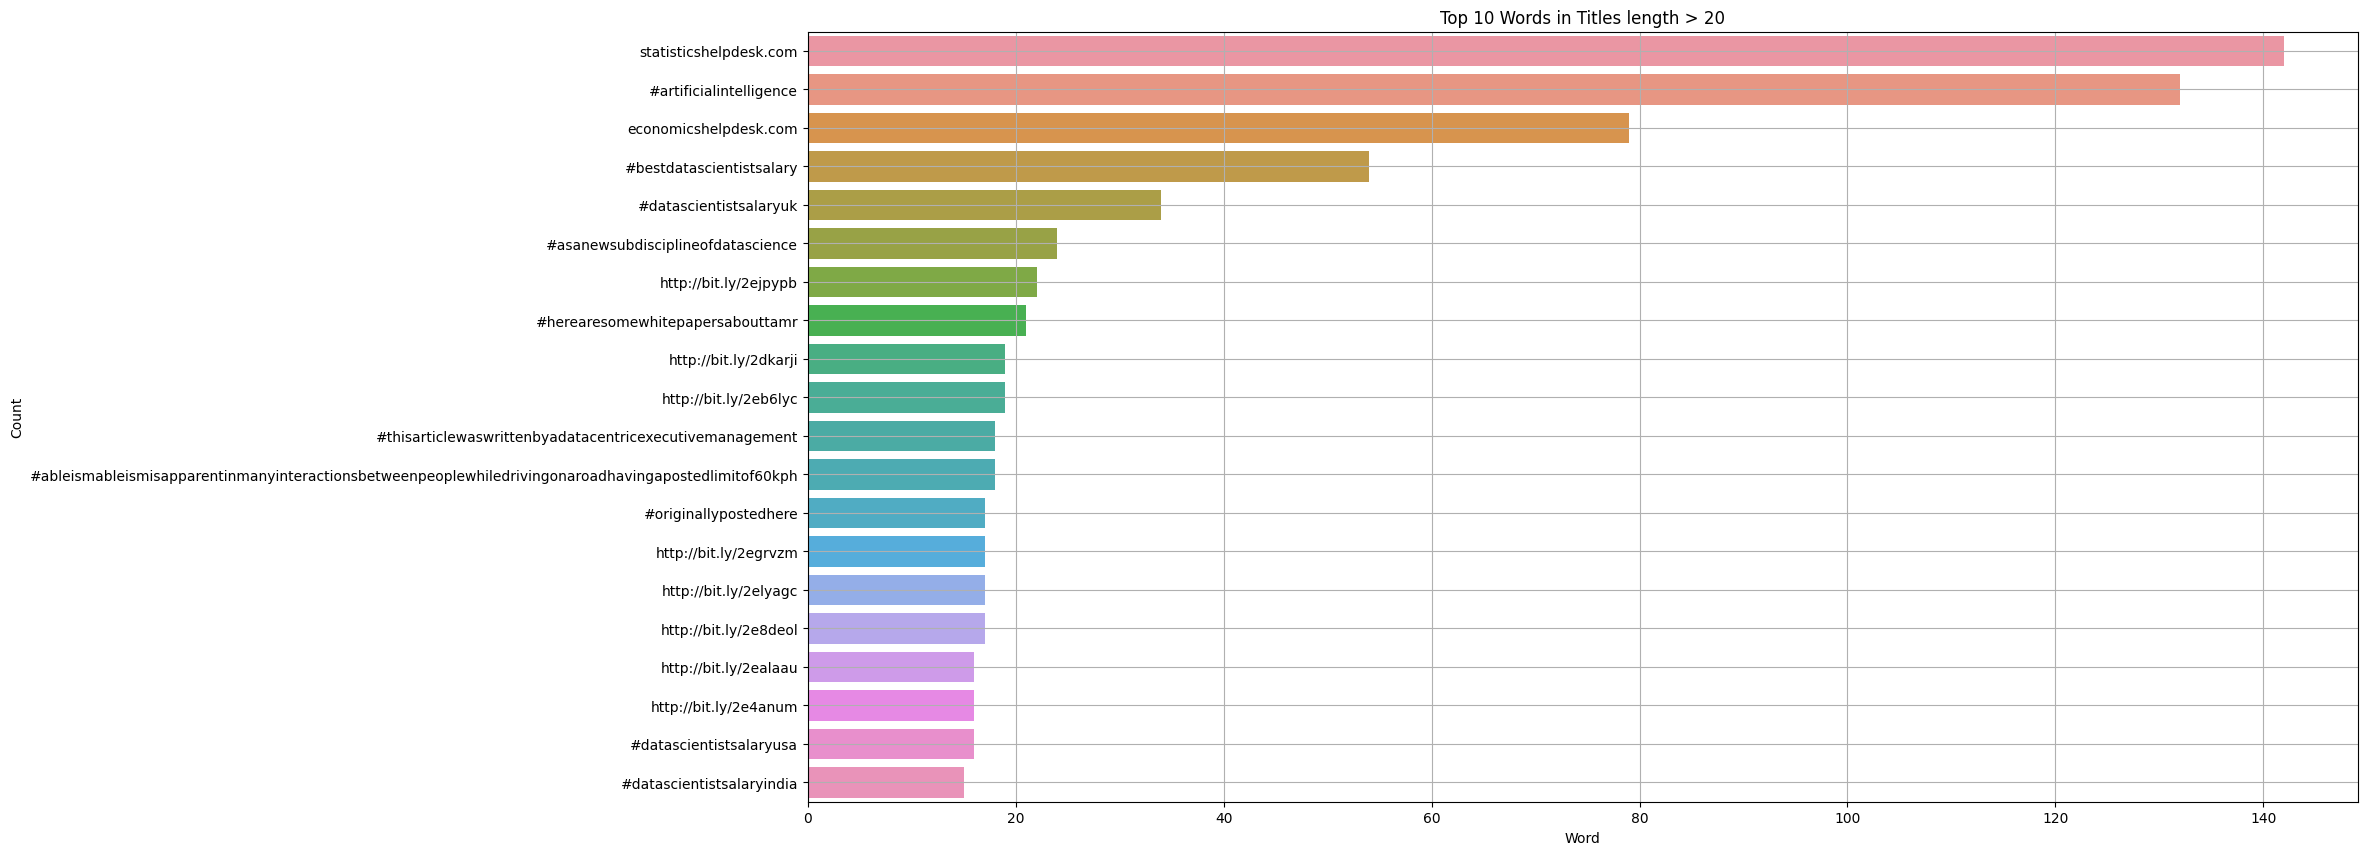

In [81]:
plt.figure(figsize=(20, 10))
plt.title('Top 10 Words in Titles length > 20')
sns.barplot(y='word', x='count', data=word_counts[word_counts['word'].str.len() > 20].head(20))
plt.xlabel('Word')
plt.ylabel('Count')
plt.grid(True)